<a href="https://colab.research.google.com/github/mitraayushi/Grade_Pred/blob/main/studentPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import csv

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
mydata= pd.read_csv("/content/drive/MyDrive/machine_learning/student-por.csv")

In [ ]:
from io import StringIO

In [ ]:
mydata.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [ ]:
headers = np.array(mydata.columns)
values = mydata.values
print(values)

[['GP;"F";18;"U";"GT3";"A";4;4;"at_home";"teacher";"course";"mother";2;2;0;"yes";"no";"no";"no";"yes";"yes";"no";"no";4;3;4;1;1;3;4;"0";"11";11']
 ['GP;"F";17;"U";"GT3";"T";1;1;"at_home";"other";"course";"father";1;2;0;"no";"yes";"no";"no";"no";"yes";"yes";"no";5;3;3;1;1;3;2;"9";"11";11']
 ['GP;"F";15;"U";"LE3";"T";1;1;"at_home";"other";"other";"mother";1;2;0;"yes";"no";"no";"no";"yes";"yes";"yes";"no";4;3;2;2;3;3;6;"12";"13";12']
 ['GP;"F";15;"U";"GT3";"T";4;2;"health";"services";"home";"mother";1;3;0;"no";"yes";"no";"yes";"yes";"yes";"yes";"yes";3;2;2;1;1;5;0;"14";"14";14']
 ['GP;"F";16;"U";"GT3";"T";3;3;"other";"other";"home";"father";1;2;0;"no";"yes";"no";"no";"yes";"yes";"no";"no";4;3;2;1;2;5;0;"11";"13";13']
 ['GP;"M";16;"U";"LE3";"T";4;3;"services";"other";"reputation";"mother";1;2;0;"no";"yes";"no";"yes";"yes";"yes";"yes";"no";5;4;2;1;2;5;6;"12";"12";13']
 ['GP;"M";16;"U";"LE3";"T";2;2;"other";"other";"home";"mother";1;2;0;"no";"no";"no";"no";"yes";"yes";"yes";"no";4;4;4;1;1;3;

In [ ]:
parsed_data = []
for row in values:
    # Splitting each row by semicolon
    attributes = row[0].split(';')

    # Removing quotes from each attribute
    attributes = [attr.strip('"') for attr in attributes]
    parsed_data.append(attributes)

# Now you have the parsed data in a list of lists format
print(len(parsed_data))
print(parsed_data[:3])

649
[['GP', 'F', '18', 'U', 'GT3', 'A', '4', '4', 'at_home', 'teacher', 'course', 'mother', '2', '2', '0', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', '4', '3', '4', '1', '1', '3', '4', '0', '11', '11'], ['GP', 'F', '17', 'U', 'GT3', 'T', '1', '1', 'at_home', 'other', 'course', 'father', '1', '2', '0', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', '5', '3', '3', '1', '1', '3', '2', '9', '11', '11'], ['GP', 'F', '15', 'U', 'LE3', 'T', '1', '1', 'at_home', 'other', 'other', 'mother', '1', '2', '0', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', '4', '3', '2', '2', '3', '3', '6', '12', '13', '12']]


In [ ]:
columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
           'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
           'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
           'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
df = pd.DataFrame(parsed_data, columns=columns)
df['G3'] = df['G3'].astype(int)

Mean Squared Error: 1.4751066611363337


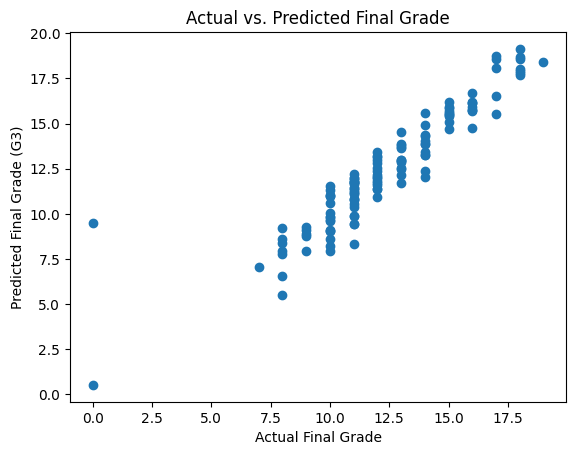

In [ ]:
# Convert parsed data into a pandas DataFrame
columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
           'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
           'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
           'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
df = pd.DataFrame(parsed_data, columns=columns)

# Convert G3 column to integer
df['G3'] = df['G3'].astype(int)

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                                  'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
                                  'activities', 'nursery', 'higher', 'internet', 'romantic'])

# Prepare the data
X = df.drop(['G3'], axis=1)  # Features (independent variables)
y = df['G3']  # Target variable (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
linear_regressor= LinearRegression()

# Train the model on the training data
linear_regressor.fit(X_train, y_train)


y_pred = linear_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Optionally, plot the results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Final Grade")
plt.ylabel("Predicted Final Grade (G3)")
plt.title("Actual vs. Predicted Final Grade")
plt.show()